In [1]:
import numpy as np
from PIL import Image
import cv2
import numpy as np


1. Load the image and make it a gray image

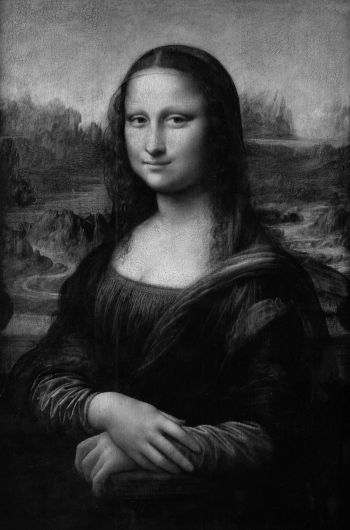

In [2]:
img = cv2.imread('Mona_Lisa_GS2.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image_ = Image.fromarray(img_gray.astype('uint8'))
image_

2. Scale the vactor image instead of working with high values

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
img_X = np.reshape(img_gray,(-1,1))
img_x = scaler.fit_transform(img_X)

3. Initilizing the centroides

In [4]:
V = np.array([20,80,140,200,255])

4. The FCM algorithm

In [5]:
class FCM:
    
    def __init__(self,img,V,C,m,m_iter):
        self.c = C
        self.m = m
        self.m_iter = m_iter
        self.V = V
        self.U = []
        self.p = 1
        
    def calculerU(self,X):
        alpha = -1./(self.m-1.)
        term1 = [ [ pow(sum(np.square(X[k]-self.V[i])), alpha) for k in range(X.shape[0]) ] for i in range(self.c)]
        term2 = [ sum([pow(sum(np.square(X[k]-self.V[i])), alpha) for i in range(self.c)]) for k in range(X.shape[0])]
        self.U = [ [ term1[i][k]/term2[k] for k in range(X.shape[0])] for i in range(self.c)]
        
    def calculerV(self, X):
        card = [ sum([pow(self.U[i][k], self.m) for k in range(X.shape[0])]) for i in range(self.c)]
        term = [ [ sum([ pow(self.U[i][k], self.m)*X[k][j] for k in range(X.shape[0])]) for j in range(self.p)] for i in range(self.c)]
        self.V = [ [ term[i][j]/card[i] for j in range(self.p)] for i in range(self.c)]
    
    def entrainer(self, X): 
        t = 0
        while(t<self.m_iter):
            self.calculerU(X)
            self.calculerV(X)
            t = t + 1
            
    def classe(self,vect): 
        term1 = [ pow(sum(np.square(vect-self.V[i])), -1./(self.m-1)) for i in range(self.c)]
        term2 = sum([ pow(sum(np.square(vect-self.V[i])), -1./(self.m-1)) for i in range(self.c)])
        u = [term1[i]/term2 for i in range(self.c)]
        return np.argmax(u)
    
    def result_img(self,X):
        res_img = []
        for i in range(len(X)):
            j = self.classe(X[i])
            res_img.append(self.V[j])
        return res_img

5. Getting the FCM image by using only 5 centers and 20 iterations

In [6]:
fcm = FCM(img_x,V,5,2,20)

fcm.entrainer(img_x)
print(fcm.V)
res = fcm.result_img(img_x)


[[1.9003315628684099], [1.0753885231018894], [0.15679301544393534], [-0.42742412759452625], [-0.875894213839175]]


6. Changing the format of the FCM vector image 

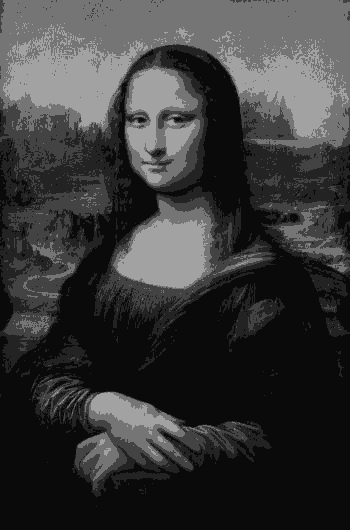

In [7]:
res_image = scaler.inverse_transform(res)
res_image = np.reshape(res_image,(530,350))

image_res = Image.fromarray(res_image.astype('uint8'))
image_res
